In [2]:
#import libraries
import os
import random as rd
import tensorflow as tf
import matplotlib.pyplot as plt
import pyBigWig as pbg
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import matplotlib as mpl
import keras.backend as K
import pandas as pd
import logomaker as lm
import seaborn as sns
import math as mt

In [3]:
pred100=np.load('/home/florian/projet/drosoSYNTH/preds_droso_synth.npz')['pred100']
predTATA=np.load('/home/florian/projet/drosoSYNTH/preds_droso_synth.npz')['predTATA']

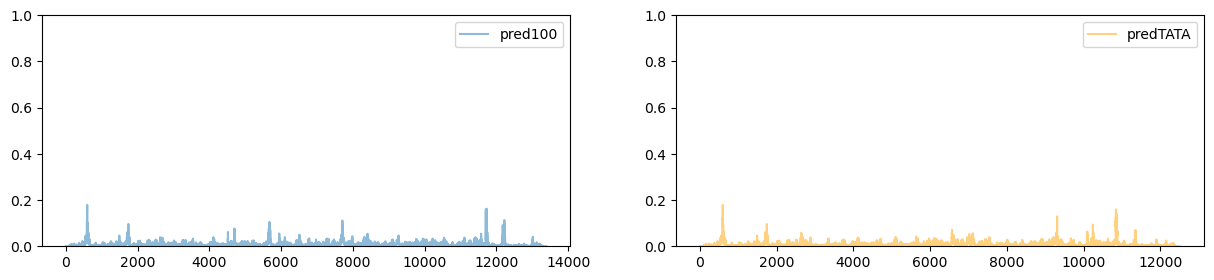

In [4]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(pred100,alpha=0.5,label="pred100")
plt.legend()
plt.ylim(0,1)
plt.subplot(1,2,2)
plt.plot(predTATA,alpha=0.5,label="predTATA",color="orange")
plt.legend()
plt.ylim(0,1)
plt.legend()

In [5]:
def mae(y_true,y_pred):
    return np.asarray(K.mean(K.abs(y_true - y_pred))).round(3)

def mse(y_true,y_pred):
    return np.asarray(np.mean((y_true - y_pred)**2)).round(3)

In [6]:
#load all chrs
with np.load('/home/florian/projet/r6.16/seq.npz') as f:
    X_2L = f['2L']
    X_2R = f['2R']
    X_3L = f['3L']
    X_3R = f['3R']
    X_4 = f['4']
    X_X = f['X']
    X_Y = f['Y']

In [7]:
#load scATACseq
with np.load('/home/florian/projet/scATACseq_14chr.npz') as f:
    Y_2L=f['2L'][0]
    Y_2R=f['2R'][0]
    Y_3L=f['3L'][0]
    Y_3R=f['3R'][0]
    Y_4=f['4'][0]
    Y_X=f['X'][0]
    Y_Y=f['Y'][0]

cut=500
Y_2L[Y_2L >= cut] = cut
Y_2L=Y_2L/cut

Y_2R[Y_2R >= cut] = cut
Y_2R=Y_2R/cut

Y_3L[Y_3L >= cut] = cut
Y_3L=Y_3L/cut

Y_3R[Y_3R >= cut] = cut
Y_3R=Y_3R/cut

Y_4[Y_4 >= cut] = cut
Y_4=Y_4/cut

Y_X[Y_X >= cut] = cut
Y_X=Y_X/cut

Y_Y[Y_Y >= 80] = 80
Y_Y=Y_Y/80

/home/dell3/anaconda3/envs/workenv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/dell3/anaconda3/envs/workenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


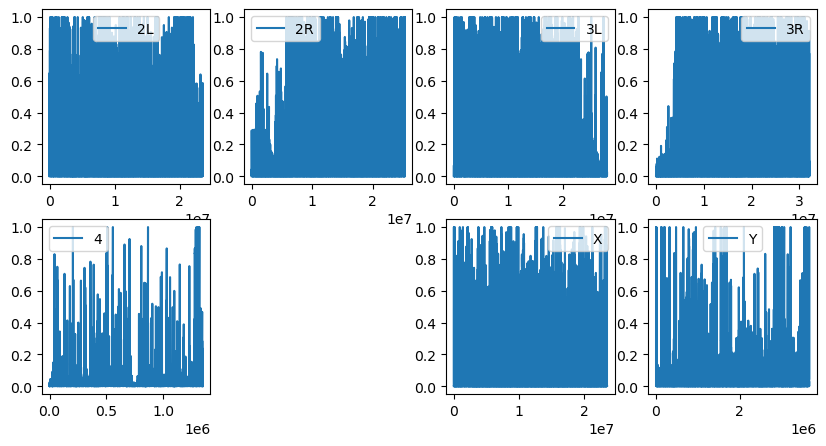

In [8]:
#show signals
plt.figure(figsize=(10,5))

plt.subplot(2,4,1)
plt.plot(Y_2L,label='2L')
plt.legend()

plt.subplot(2,4,2)
plt.plot(Y_2R,label='2R')
plt.legend()

plt.subplot(2,4,3)
plt.plot(Y_3L,label='3L')
plt.legend()

plt.subplot(2,4,4)
plt.plot(Y_3R,label='3R')
plt.legend()

plt.subplot(2,4,5)
plt.plot(Y_4,label='4')
plt.legend()

plt.subplot(2,4,7)
plt.plot(Y_X,label='X')
plt.legend()

plt.subplot(2,4,8)
plt.plot(Y_Y,label='Y')
plt.legend()

In [13]:
#load predictions
df = pd.read_csv ('/home/florian/projet/models/new_cut_10LR/history.csv')
pred2L=np.load('/home/florian/projet/models/preds_new_cut_10LR.npz')['pred2L']
pred2R=np.load('/home/florian/projet/models/preds_new_cut_10LR.npz')['pred2R']
pred3L=np.load('/home/florian/projet/models/preds_new_cut_10LR.npz')['pred3L']
pred3R=np.load('/home/florian/projet/models/preds_new_cut_10LR.npz')['pred3R']
pred4=np.load('/home/florian/projet/models/preds_new_cut_10LR.npz')['pred4']
predX=np.load('/home/florian/projet/models/preds_new_cut_10LR.npz')['predX']
predY=np.load('/home/florian/projet/models/preds_new_cut_10LR.npz')['predY']
corr2L=round(np.corrcoef(Y_2L[::10],pred2L)[0][1],3)
corr2R=round(np.corrcoef(Y_2R[::10],pred2R)[0][1],3)
corr3R=round(np.corrcoef(Y_3R[1::10],pred3R)[0][1],3)#1
corr3L=round(np.corrcoef(Y_3L[::10],pred3L)[0][1],3)
corr4=round(np.corrcoef(Y_4[1::10],pred4)[0][1],3)#1
corrX=round(np.corrcoef(Y_X[1::10],predX)[0][1],3)#1
corrY=round(np.corrcoef(Y_Y[::10],predY)[0][1],3)
mse2L=mse(Y_2L[::10],pred2L)
mse2R=mse(Y_2R[::10],pred2R)
mse3L=mse(Y_3L[::10],pred3L)
mse3R=mse(Y_3R[1::10],pred3R)
mse4=mse(Y_4[1::10],pred4)
mseX=mse(Y_X[1::10],predX)
mseY=mse(Y_Y[::10],predY)
# corr2L=np.corrcoef(Y_2L[::5],pred2L)[0][1]
# corr2R=np.corrcoef(Y_2R[1::5],pred2R)[0][1]
# corr3R=np.corrcoef(Y_3R[1::5],pred3R)[0][1]#1
# corr3L=np.corrcoef(Y_3L[::5],pred3L)[0][1]
# corr4=np.corrcoef(Y_4[1::5],pred4)[0][1]#1
# corrX=np.corrcoef(Y_X[1::5],predX)[0][1]#1
# corrY=np.corrcoef(Y_Y[::5],predY)[0][1]
# corr2L=np.corrcoef(Y_2L,pred2L.ravel())[0][1]
# corr2R=np.corrcoef(Y_2R,pred2R.ravel())[0][1]
# corr3R=np.corrcoef(Y_3R,pred3R.ravel())[0][1]
# corr3L=np.corrcoef(Y_3L,pred3L.ravel())[0][1]
# corr4=np.corrcoef(Y_4,pred4.ravel())[0][1]
# corrX=np.corrcoef(Y_X,predX.ravel())[0][1]
# corrY=np.corrcoef(Y_Y,predY.ravel())[0][1]

(0.001, 15)

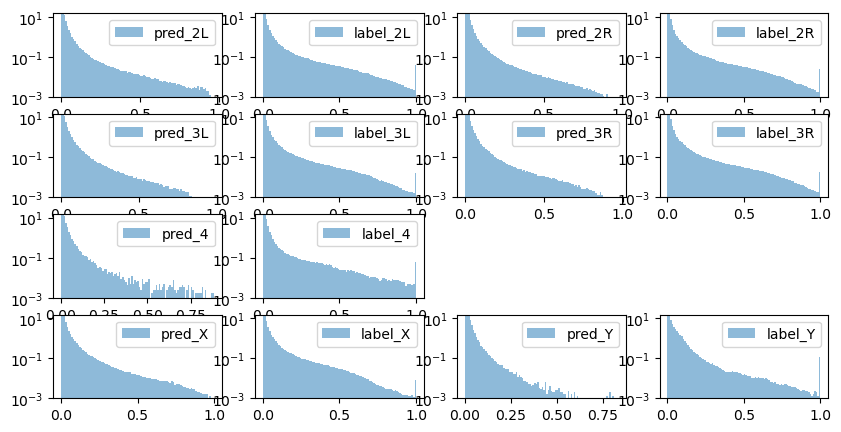

In [14]:
#signal and pred distribution

plt.figure(figsize=(10,5))
plt.subplot(4,4,1)
plt.yscale("log")
plt.hist(pred2L,bins=100,alpha=0.5,label="pred_2L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,2)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="label_2L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,3)
plt.yscale("log")
plt.hist(pred2R,bins=100,alpha=0.5,label="pred_2R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,4)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="label_2R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,5)
plt.yscale("log")
plt.hist(pred3L,bins=100,alpha=0.5,label="pred_3L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,6)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="label_3L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,7)
plt.yscale("log")
plt.hist(pred3R,bins=100,alpha=0.5,label="pred_3R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,8)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="label_3R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,9)
plt.yscale("log")
plt.hist(pred4,bins=100,alpha=0.5,label="pred_4",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,10)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="label_4",density=True)
plt.legend()
plt.yscale("log")
plt.ylim(0.001,15)

plt.subplot(4,4,13)
plt.yscale("log")
plt.hist(predX,bins=100,alpha=0.5,label="pred_X",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,14)
plt.yscale("log")
plt.hist(Y_X,bins=100,alpha=0.5,label="label_X",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,15)
plt.yscale("log")
plt.hist(predY,bins=100,alpha=0.5,label="pred_Y",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,16)
plt.yscale("log")
plt.hist(Y_Y,bins=100,alpha=0.5,label="label_Y",density=True)
plt.legend()
plt.ylim(0.001,15)

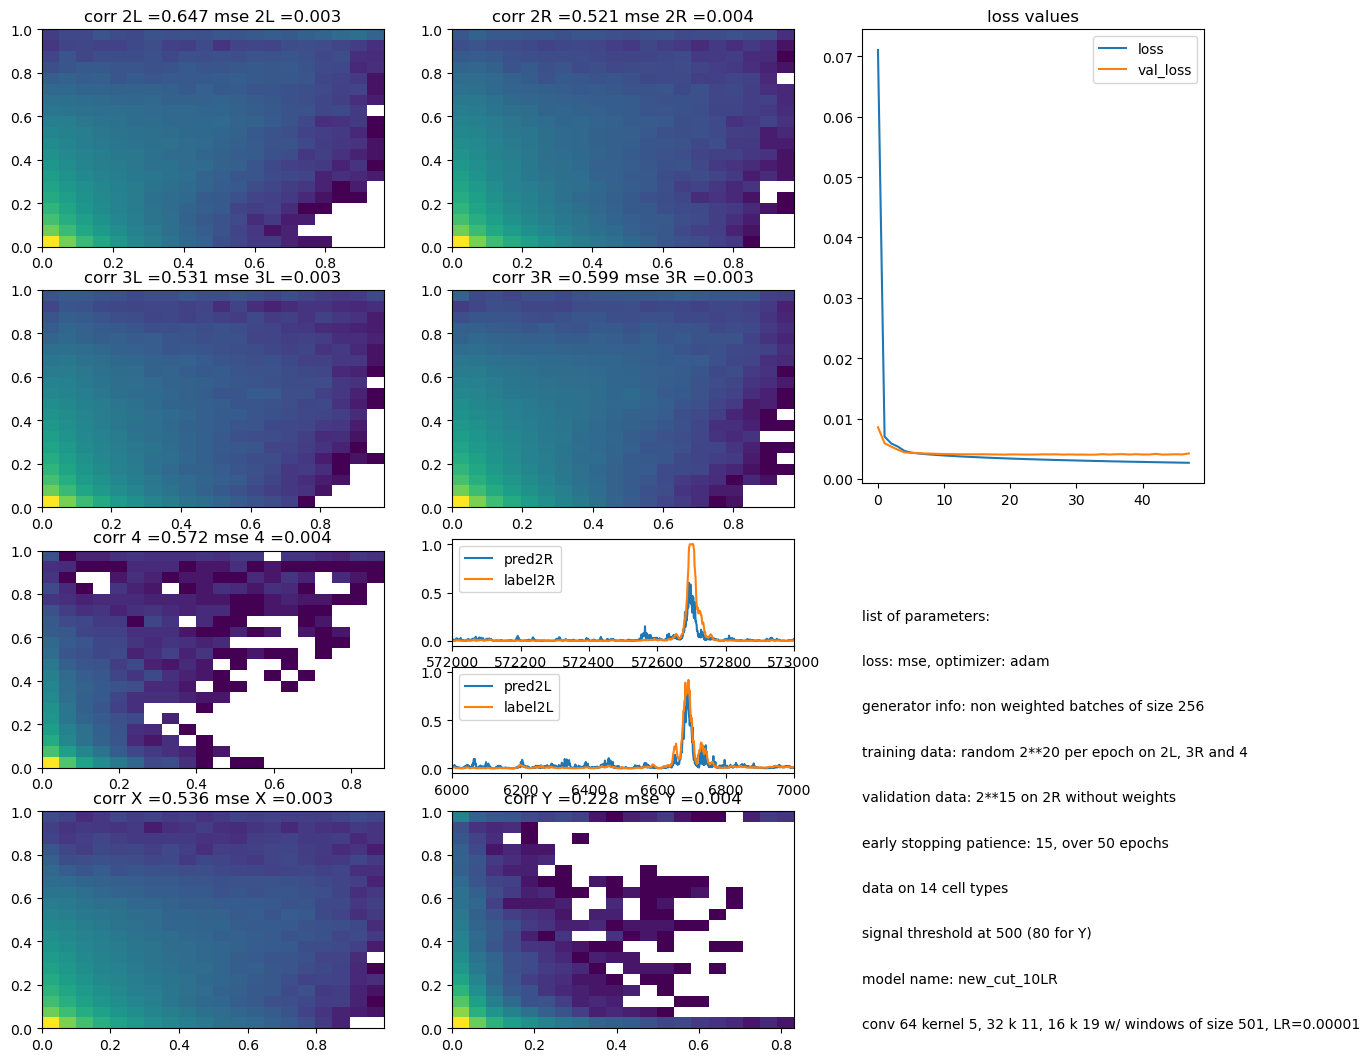

In [15]:
#plots

plt.figure(figsize=(15,10))

plt.subplot(4,3,1)
plt.hist2d(pred2L,Y_2L[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 2L ='+str(corr2L)+' mse 2L ='+str(mse2L))

plt.subplot(4,3,2)
plt.hist2d(pred2R,Y_2R[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 2R ='+str(corr2R)+' mse 2R ='+str(mse2R))

plt.subplot(4,3,4)
plt.hist2d(pred3L,Y_3L[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 3L ='+str(corr3L)+' mse 3L ='+str(mse3L))

plt.subplot(4,3,5)
plt.hist2d(pred3R,Y_3R[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 3R ='+str(corr3R)+' mse 3R ='+str(mse3R))

plt.subplot(4,3,7)
plt.hist2d(pred4,Y_4[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 4 ='+str(corr4)+' mse 4 ='+str(mse4))

plt.subplot(4,3,10)
plt.hist2d(predX,Y_X[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr X ='+str(corrX)+' mse X ='+str(mseX))

plt.subplot(4,3,11)
plt.hist2d(predY,Y_Y[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr Y ='+str(corrY)+' mse Y ='+str(mseY))

plt.subplot(2,3,3)
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()
plt.title('loss values')

plt.subplot(8,3,14)
plt.plot(pred2R,label='pred2R')
plt.plot(Y_2R[::10],label='label2R')
plt.xlim(572000,573000)
plt.legend()

plt.subplot(8,3,17)
plt.plot(pred2L,label='pred2L')
plt.plot(Y_2L[::10],label='label2L')
plt.xlim(6000,7000)
plt.legend()

plt.subplot(2,3,6)
plt.axis([0, 10, 0, 10])
plt.text(0,9,"list of parameters:")
plt.text(0,8,"loss: mse, optimizer: adam")
plt.text(0,7,"generator info: non weighted batches of size 256")
plt.text(0,6,"training data: random 2**20 per epoch on 2L, 3R and 4")
plt.text(0,5,"validation data: 2**15 on 2R without weights")
plt.text(0,4,"early stopping patience: 15, over 50 epochs")
plt.text(0,3,"data on 14 cell types")
plt.text(0,2,"signal threshold at 500 (80 for Y)")
plt.text(0,1,"model name: new_cut_10LR")
plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19 w/ windows of size 501, LR=0.00001")

plt.axis("off")

plt.subplots_adjust(bottom=0.001, top=0.9999)

In [ ]:
#multiple plots

os.chdir('/home/florian/projet/results')
fichiers = os.listdir('/home/florian/projet/cell_types')
for file in fichiers:
   cut=50
   Y_2L=np.load('/home/florian/projet/cell_types/'+file)['2L'][0]
   Y_2L[Y_2L >= cut] = cut
   Y_2L=Y_2L/cut

   Y_2R=np.load('/home/florian/projet/cell_types/'+file)['2R'][0]
   Y_2R[Y_2R >= cut] = cut
   Y_2R=Y_2R/cut

   Y_3L=np.load('/home/florian/projet/cell_types/'+file)['3L'][0]
   Y_3L[Y_3L >= cut] = cut
   Y_3L=Y_3L/cut

   Y_3R=np.load('/home/florian/projet/cell_types/'+file)['3R'][0]
   Y_3R[Y_3R >= cut] = cut
   Y_3R=Y_3R/cut

   Y_4=np.load('/home/florian/projet/cell_types/'+file)['4'][0]
   Y_4[Y_4 >= cut] = cut
   Y_4=Y_4/cut

   Y_X=np.load('/home/florian/projet/cell_types/'+file)['X'][0]
   Y_X[Y_X >= cut] = cut
   Y_X=Y_X/cut

   Y_Y=np.load('/home/florian/projet/cell_types/'+file)['Y'][0]
   Y_Y[Y_Y >= 15] = 15
   Y_Y=Y_Y/15
   df = pd.read_csv ('/home/florian/projet/models/new_cut_{}/history.csv'.format(file[10:-41]))
   pred2L=np.load('/home/florian/projet/models/preds_new_cut_{}.npz'.format(file[10:-41]))['pred2L']
   pred2R=np.load('/home/florian/projet/models/preds_new_cut_{}.npz'.format(file[10:-41]))['pred2R']
   pred3L=np.load('/home/florian/projet/models/preds_new_cut_{}.npz'.format(file[10:-41]))['pred3L']
   pred3R=np.load('/home/florian/projet/models/preds_new_cut_{}.npz'.format(file[10:-41]))['pred3R']
   pred4=np.load('/home/florian/projet/models/preds_new_cut_{}.npz'.format(file[10:-41]))['pred4']
   predX=np.load('/home/florian/projet/models/preds_new_cut_{}.npz'.format(file[10:-41]))['predX']
   predY=np.load('/home/florian/projet/models/preds_new_cut_{}.npz'.format(file[10:-41]))['predY']
   corr2L=round(np.corrcoef(Y_2L[::10],pred2L)[0][1],3)
   corr2R=round(np.corrcoef(Y_2R[::10],pred2R)[0][1],3)
   corr3R=round(np.corrcoef(Y_3R[1::10],pred3R)[0][1],3)
   corr3L=round(np.corrcoef(Y_3L[::10],pred3L)[0][1],3)
   corr4=round(np.corrcoef(Y_4[1::10],pred4)[0][1],3)
   corrX=round(np.corrcoef(Y_X[1::10],predX)[0][1],3)
   corrY=round(np.corrcoef(Y_Y[::10],predY)[0][1],3)
   mae2L=mae(Y_2L[::10],pred2L)
   mae2R=mae(Y_2R[::10],pred2R)
   mae3L=mae(Y_3L[::10],pred3L)
   mae3R=mae(Y_3R[1::10],pred3R)
   mae4=mae(Y_4[1::10],pred4)
   maeX=mae(Y_X[1::10],predX)
   maeY=mae(Y_Y[::10],predY)


   plt.figure(figsize=(15,10))

   plt.subplot(4,3,1)
   plt.hist2d(pred2L,Y_2L[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 2L ='+str(corr2L)+' mae 2L ='+str(mae2L))

   plt.subplot(4,3,2)
   plt.hist2d(pred2R,Y_2R[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 2R ='+str(corr2R)+' mae 2R ='+str(mae2R))

   plt.subplot(4,3,4)
   plt.hist2d(pred3L,Y_3L[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 3L ='+str(corr3L)+' mae 3L ='+str(mae3L))

   plt.subplot(4,3,5)
   plt.hist2d(pred3R,Y_3R[1::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 3R ='+str(corr3R)+' mae 3R ='+str(mae3R))

   plt.subplot(4,3,7)
   plt.hist2d(pred4,Y_4[1::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 4 ='+str(corr4)+' mae 4 ='+str(mae4))

   plt.subplot(4,3,10)
   plt.hist2d(predX,Y_X[1::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr X ='+str(corrX)+' mae X ='+str(maeX))

   plt.subplot(4,3,11)
   plt.hist2d(predY,Y_Y[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr Y ='+str(corrY)+' mae Y ='+str(maeY))

   plt.subplot(2,3,3)
   plt.plot(df['loss'],label='loss')
   plt.plot(df['val_loss'],label="val_loss")
   plt.legend()
   plt.title('loss values')

   plt.subplot(8,3,14)
   plt.plot(pred2R,label='pred2R')
   plt.plot(Y_2R[::10],label='label2R')
   plt.xlim(572000,573000)
   plt.legend()

   plt.subplot(8,3,17)
   plt.plot(pred2L,label='pred2L')
   plt.plot(Y_2L[::10],label='label2L')
   plt.xlim(6000,7000)
   plt.legend()

   plt.subplot(2,3,6)
   plt.axis([0, 10, 0, 10])
   plt.text(0,9,"list of parameters:")
   plt.text(0,8,"loss: mae+cor, optimizer: adam")
   plt.text(0,7,"generator info: new weights each batch with batches of size 1024")
   plt.text(0,6,"training data: random 2**20 per epoch on X, 3L and 4")
   plt.text(0,5,"validation data: 2**14 on 3R")
   plt.text(0,4,"early stopping patience: 5, over 20 epochs")
   plt.text(0,3,"data on {}".format(file[10:-41]))
   plt.text(0,2,"signal cut at 100")
   plt.text(0,1,"{}".format(file[10:-41]))
   plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19 w/ windows of size 2001")

   plt.axis("off")

   plt.subplots_adjust(bottom=0.001, top=0.9999)

   plt.savefig('{}_new.png'.format(file[10:-41]), bbox_inches='tight')

Text(0.5, 1.0, '15357255-15400802 on 3L')

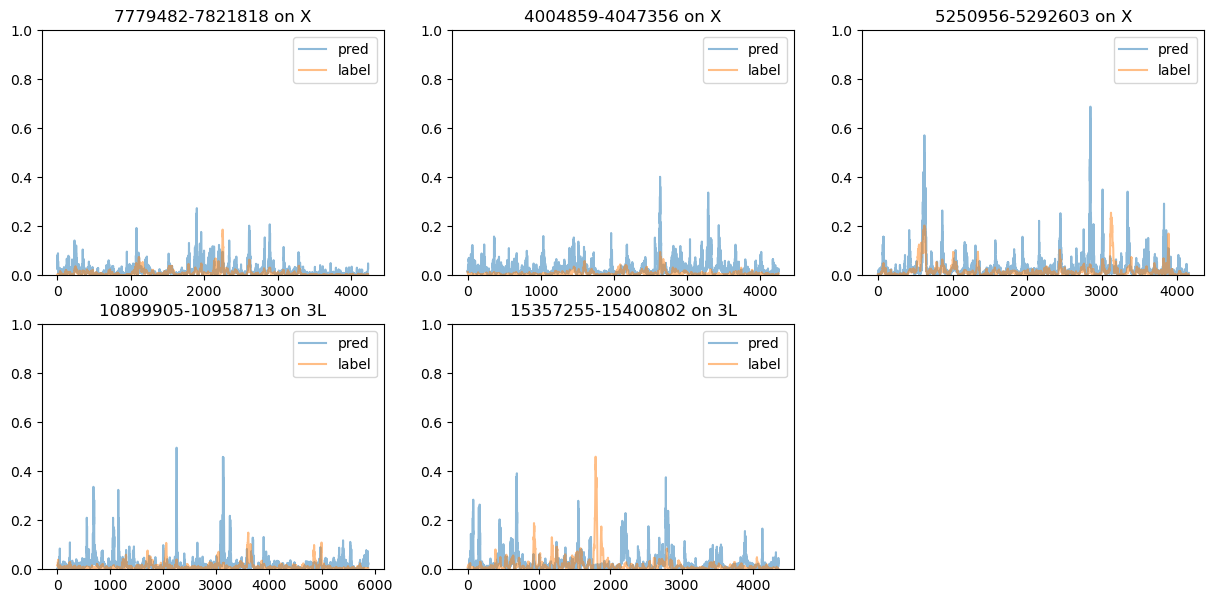

In [12]:
#regions of interest

plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.plot(predX[7779482//10:7821818//10],alpha=0.5,label="pred")
plt.plot(Y_X[7779482:7821818:10],alpha=0.5,label="label")
plt.ylim(0,1)
plt.legend()
plt.title('7779482-7821818 on X')

plt.subplot(2,3,2)
plt.plot(predX[4004859//10:4047356//10],alpha=0.5,label="pred")
plt.plot(Y_X[4004859:4047356:10],alpha=0.5,label="label")
plt.ylim(0,1)
plt.legend()
plt.title('4004859-4047356 on X')

plt.subplot(2,3,3)
plt.plot(predX[5250956//10:5292603//10],alpha=0.5,label="pred")
plt.plot(Y_X[5250956:5292603:10],alpha=0.5,label="label")
plt.ylim(0,1)
plt.legend()
plt.title('5250956-5292603 on X')

plt.subplot(2,3,4)
plt.plot(predX[10899905//10:10958713//10],alpha=0.5,label="pred")
plt.plot(Y_3L[10899905:10958713:10],alpha=0.5,label="label")
plt.ylim(0,1)
plt.legend()
plt.title('10899905-10958713 on 3L')

plt.subplot(2,3,5)
plt.plot(predX[15357255//10:15400802//10],alpha=0.5,label="pred")
plt.plot(Y_3L[15357255:15400802:10],alpha=0.5,label="label")
plt.ylim(0,1)
plt.legend()
plt.title('15357255-15400802 on 3L')